<a href="https://colab.research.google.com/github/Graviton12/MLA_SZM/blob/main/MLA4_SZM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment #4
### Samia Mahmood
### CS 430
### Machine Learning in the Cloud

# Problem 1
## 1) Imports for specific models
#### Include imports for tree
### Standard Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# general importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Imports for specific models

In [3]:
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

### Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

### Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## 2) Decision Tree Classification - Acquire Data
Load the banknote_authentication.csv into a data frame named df

In [8]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/banknote_authentication.csv')

# vewing the dataset
df.sample(6)

,variance,skewness,curtosis,entropy,forgery
964,-1.41060,-7.10800,5.64540,0.31335,1
1209,-0.69078,-0.50077,-0.35417,0.47498,1
568,4.34350,3.32950,0.83598,0.64955,0
778,-0.77461,-1.87680,2.40230,1.13190,1
746,4.64990,7.63360,-1.94270,-0.37458,0
900,-0.65767,-2.80180,3.71150,0.99739,1


## 3) Statistical and Visual Exploration
You do not need this section for this notebook - you did this in last module's assignment.

## 4) Splitting Data into Train/Test
Create a data frame called X of your inputs that includes all columns except date and forgery.

In [9]:
# creating a dataframe excluding forergy. This will be our X
X_class = df.drop('forgery', axis=1)

X_class.sample(8)

,variance,skewness,curtosis,entropy
1158,-3.32030,-0.02691,2.96180,-0.44958
256,3.09340,-2.91770,2.22320,0.22283
1233,-7.04210,9.20000,0.25933,-4.68320
109,2.91630,10.83060,-3.34370,-4.12200
477,3.48930,6.69000,-1.20420,-0.38751
528,3.62440,1.46090,1.35010,1.92840
23,0.93584,8.88550,-1.68310,-1.65990
715,3.49160,8.57090,-3.03260,-0.59182


Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.

In [10]:
# creating a dataframe for just forgery. This will be our y
y_class = df['forgery']

y_class.sample(8)

,forgery
179,0
931,1
564,0
67,0
808,1
74,0
54,0
626,0


Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [11]:
# splitting the data into the train and test set
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

## 5) Building the Pipeline
Create a column transformer that will MinMax scale the numerical variables

In [12]:
# creating the numerical features
numerical_features = ['variance', 'skewness', 'curtosis', 'entropy']

# transforming the numerical columns using MInMax scaler and combining preprocessing steps into column tranformer
preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), numerical_features)])

Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.

In [13]:
# creating pipeline
pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

## 6) Executing the Model
Run the pipeline to fit the DecisionTreeClassification model.

In [14]:
# running the pipeline in order to fit the model
pipeline.fit(X_train_class, y_train_class)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', DecisionTreeClassifier())])

## 7) Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [15]:
# creating y_pred
y_pred_class=pipeline.predict(X_test_class)

Call the plot_cm function to generate the confusion matrix.

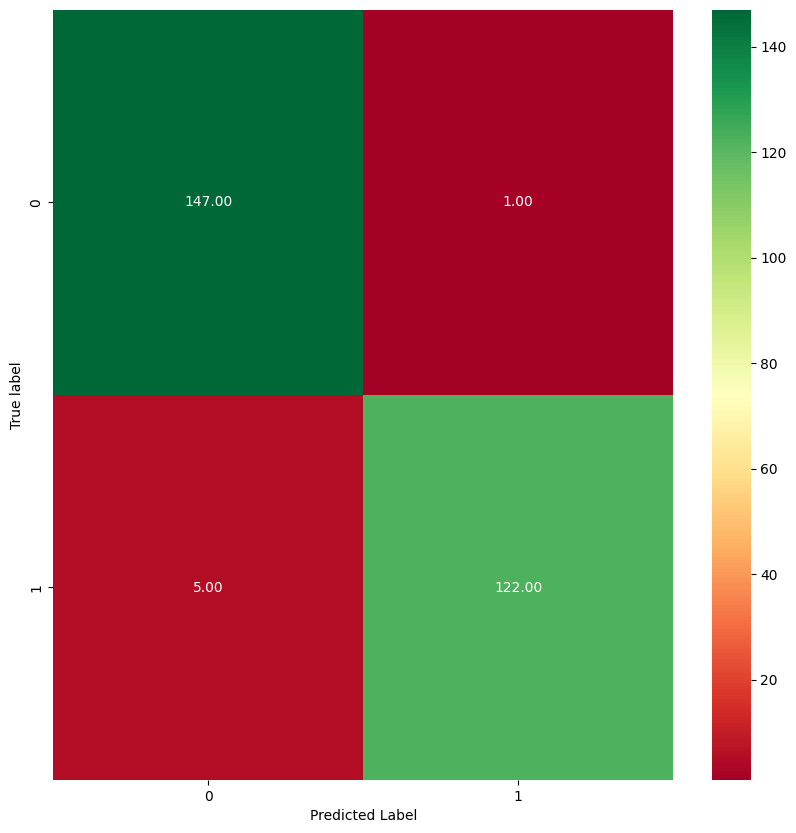

In [16]:
# plotting the confusion matrix
plot_cm(y_test_class, y_pred_class)

Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

In [17]:
# creating classification report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



Based on the confusion matrix:
* Our decision tree classification matrix performed well. This is because 147 non-forgeries were correctly predicted to be non-forgereis while 122 forgeries were correctly predicted to be forgeries. However, the model was not perfect since there were 5 forgeries which were incorrectly classifed as non-forgereis by the model and there was 1 non-forgery which was incorrectly classified as a forgery based on the model.

Based on the classification report:
* Precision Score: We had a high precision of 0.97 for the non-forgeries class and a very high precision of 0.99 for the forgery class. This indicates that the model had a strong predictive performance overall though the performance was better for forgeries compared to non0-forgeries.
* Recall Score: We had a very high recall score of 0.99 for non-forgeries and a high score of 0.96 for forgeries. This indicates that the model was able to capture almost all the instances for non-forgeries whereas the model was able to capture a majority of the instances for forgeries.
* F1 score: The model had a high F1-score of 0.98 for both forgeries and non-forgeries which indicates thats the overall performance for both precision and recall scores were good.

## 8) Conclusion
In a Markdown comment, write a conclusion on how suitable you think this model is for predicting with or not a banknote is a forgery.

Based on our results, we cna conclude that this model seems suitable for predicting whether or not a banknote is a forgery since the accuracy score was 0.98 meaning the model was overal 98% accurate. Based on the confusion matrix, we found that there was 1 instance of a false positive and 5 instances of a false negative. This implies that the model did very well though there may be additional room for improvement as 5 forgeries were incorrectly classfied as forgeries. Given our high F1-score of 0.98 in combination with our recall scores and precision scores for both classes, this supports our conclusion that the model was suitable.

# Problem 2
Now you are going to do an Decision Tree Regression to predict whether the usage in KWH for the steel industry data.  You should already have a copy of this data because you used it in a previous model. If you do not, I have attached a copy to this assignment.  


## 1) Decision Tree Regression - Acquire Data
Load the Steel_industry_data.csv into a data frame named df.

In [18]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/CS 430/Colab Notebooks/Steel_industry_data.csv')

# viewing dataset
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Rename the columns according to Table 1: Columns Names.

In [19]:
# renaming the columns in the dataset
df = df.rename(columns={'Usage_kWh': 'usage_kWh', 'Lagging_Current_Reactive.Power_kVarh': 'lagging_current_reactive.power_kvarh',
                        'Leading_Current_Reactive_Power_kVarh': 'leading_current_reactive_power_kvarh', 'Lagging_Current_Power_Factor': 'lagging_current_power_factor',
                        'Leading_Current_Power_Factor': 'leading_current_power_factor', 'NSM': 'nsm', 'WeekStatus':'week_status', 'Day_of_week': 'load_week',
                        'Load_Type':'load_type'})

# checking if columns were renamed
df.head()

,date,usage_kWh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,CO2(tCO2),lagging_current_power_factor,leading_current_power_factor,nsm,week_status,load_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## 2) Splitting Data into Train/Test

Create a data frame called X of your inputs that includes all columns except date and usage_kwh.

In [20]:
# Create a data frame X of inputs that includes all columns except date and usage_kwh.
X = df.drop(['date', 'usage_kWh'], axis=1)

Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.

In [21]:
# Create a data frame y of output that includes only usage_kwh. This is the target variable.
y = df['usage_kWh']

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [22]:
# Splitting the data into Train/Test sets.  Use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3) Building the Pipeline

Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).

In [23]:
# Creating a column transformer using OneHotEncode for the categorical variables and MinMax scale for the numerical variables
numerical_features = ['lagging_current_reactive.power_kvarh', 'leading_current_reactive_power_kvarh', 'lagging_current_power_factor', 'leading_current_power_factor', 'nsm']
categorical_features = ['week_status', 'load_week', 'load_type']

# incorporating the preprocessing steps into a column tranformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.

In [24]:
# creating a pipeline that will transform the data and then run a Decision Tree Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor())])

## 5) Executing the Model
Run the pipeline to fit the DecisionTreeRegression.


In [25]:
# running the pipeline in order to fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lagging_current_reactive.power_kvarh',
                                                   'leading_current_reactive_power_kvarh',
                                                   'lagging_current_power_factor',
                                                   'leading_current_power_factor',
                                                   'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'load_week',
                                                   'load_type'])])),
                ('regressor', DecisionTreeRegressor())])

## 6) Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [26]:
# running the pipeline to predict y values
y_pred=pipeline.predict(X_test)

Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.

In [27]:
# calculating the rmse for test
rmse_test = root_mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error for Test:', rmse_test)

# calculating the rmse for train
rmse_train = root_mean_squared_error(y_train, pipeline.predict(X_train))
print('Root Mean Squared Error for Train:', rmse_train)

Root Mean Squared Error for Test: 1.296994363077142
Root Mean Squared Error for Train: 1.9645861613466227e-16


Based on our root mean squared error for the test which has a value of 1.297 and our root mean squared error for the train which was 1.965 x 10^-16, we can conclude that the model performed very well in predicting the true y values.

## 7) Conclusion
In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh power usage.

Overall, the model seems very suitable for predicting the power usage in kWh given that the root mean squared error of 1.965 x 10^-16 which is approximately 0 for train and a root mean squared error of 1.297 for test. Hence, we can conclude that the model was very accurate in predicting the true y values. Though given such a low root mean squared error for the train set, we would need to ensure that the model did not experience overfitting.